# Lending Club Case Study 

## Problem Statement 

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given for this case study contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

## Analysis Approach

1. Data sourcing (Upgrad given loan.csv file) 
2. After data sourcing apply EDA concept and perform the required changes/cleanup on the received data. 
3. Then apply actual Data Analysis and Data Visualization concepts, which will helps to understand the trends.
4. And, share the outcome. 

In [8]:
## import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # just to ignore warnings
warnings.filterwarnings('ignore')

In [9]:
#data sourcing - read the data set and check the first rows
loan_data = pd.read_csv('loan.csv')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [10]:
#dataframe shape - rows X columns
loan_data.shape

(39717, 111)

## Data Handling and Data Cleaning

#### First few steps we will handle incorrect data and missing values before moving to data analysis stage
- Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
    
- Incorrect Data Types:
    - Clean certain values
    - Clean and convert an entire column

In [11]:
#data cleaning 
#check for all null columns and handle 
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [12]:
#dropping all null columns
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [13]:
loan_data.shape

(39717, 57)

#### There are several columns with single valued
- Single valued columns will not contribute in analysis, so will drop those columns
    - application_type
    - initial_list_status
    - next_pymnt_d
    - pymnt_plan
    - policy_code
    - tax_liens
    - delinq_amnt
    - pub_rec_bankruptcies
    - acc_now_delinq

#### There are few values which are post loan approval attributes, which dont contribute in defaulter analysis 
- collections_12_mths_ex_med
- delinq_2yrs
- collection_recovery_fee
- recoveries
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- revol_bal
- total_rec_late_fee
- mths_since_last_delinq
- mths_since_last_record
- chargeoff_within_12_mths
- last_pymnt_d
- last_pymnt_amnt

#### Removing irrlevent columns for the loan defaukting analysis:
- title
- emp_title
- id
- member_id
- url
- zip_code
- last_credit_pull_d
- addr_state
- desc
- total_pymnt_inv
- out_prncp_inv

In [14]:
#dropping null and unnecessary columns
loan_data = loan_data.drop(['total_pymnt_inv','mths_since_last_delinq','mths_since_last_record','total_pymnt','total_rec_prncp','total_rec_int','revol_bal','out_prncp_inv','total_rec_late_fee','application_type','delinq_2yrs','desc','acc_now_delinq','initial_list_status','next_pymnt_d','chargeoff_within_12_mths','pymnt_plan','policy_code','collections_12_mths_ex_med','delinq_amnt','pub_rec_bankruptcies','tax_liens','collection_recovery_fee','title','emp_title','id','member_id','url','zip_code','last_credit_pull_d','addr_state','acc_now_delinq','recoveries','out_prncp','last_pymnt_d','last_pymnt_amnt'],axis = 1)

In [15]:
#if any further missing columns
round((loan_data.isnull().sum()/loan_data.shape[0])*100,2)
#As we see very few columns values are null which can be handled later with imputation method

loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
dti                    0.00
earliest_cr_line       0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
revol_util             0.13
total_acc              0.00
dtype: float64

In [16]:
#if any further missing rows
round((loan_data.isnull().sum(axis=1)/loan_data.shape[0])*100,2)
#As we see no missing values in rows 

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Length: 39717, dtype: float64

In [17]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


In [18]:
#reading all necessary columns
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc'],
      dtype='object')

In [19]:
loan_data.shape

(39717, 22)

### Our objective is to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.
- So in this case we need to consider only Fully Paid or Charged Off loans applications
- To exclude that data , removing the records with current loan status i.e., loan_status != current

In [20]:
#removed in progress loan i.e., Current Loans
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [21]:
#check missing values
loan_data.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
dtype: int64

In [22]:
#as we see "emp_length" and "revol_util" has some null values 
#before handling lets see what are the values these columns contains
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  dti                  38577 non-null  floa

In [23]:
#to handle the "emp_length" null values by Imputation method (fill the mode value)
print(loan_data['emp_length'].mode()[0])
loan_data.emp_length.value_counts()

10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [24]:
#fill the null values
loan_data['emp_length'].fillna(loan_data['emp_length'].mode()[0], inplace = True)
loan_data.emp_length.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
5        False
         ...  
39712    False
39713    False
39714    False
39715    False
39716    False
Name: emp_length, Length: 38577, dtype: bool>

In [25]:
#drop the rows "revol_util" is null
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

In [26]:
#format the "annual_inc" columns to float
loan_data.annual_inc = loan_data['annual_inc'].astype(float)

In [27]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc
count,38527.000000,38527.000000,38527.000000,38527.000000,3.852700e+04,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000
mean,11055.265139,10791.956939,10230.940095,322.678650,6.880923e+04,13.276353,0.871752,9.281413,0.055442,22.067615
std,7348.433587,7090.256225,7022.678989,208.649278,6.421493e+04,6.671392,1.071756,4.400158,0.237853,11.422526
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,2.000000
25%,5325.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.140000,0.000000,6.000000,0.000000,13.000000
50%,9600.000000,9600.000000,8750.000000,278.150000,5.900000e+04,13.370000,1.000000,9.000000,0.000000,20.000000
75%,15000.000000,15000.000000,14000.000000,425.860000,8.200000e+04,18.560000,1.000000,12.000000,0.000000,29.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,90.000000


#### Standardizing the data
- "revol_util" column although described as an object column, it has continous values. Need to be standardzise the data
- "emp_Length" column also having Object. But we can consider < 1 years to 10+ years ~ 0 to 11 respectively.
- "int_rate" is also need to standardize to float
- "term" is having only two values in the column so we can assume it as categorical data.

In [28]:
loan_data['revol_util'] = pd.to_numeric(loan_data['revol_util'].apply(lambda x : x.split('%')[0]))

In [29]:
#remove the "%" from int_rate and change to float type
loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'].apply(lambda x : x.split('%')[0]))

In [30]:
#remove the extra < , + Yeras from the 'emp_length' and change data type to int
loan_data['emp_length'] = loan_data['emp_length'].astype("str")
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: x.replace("years",""))
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: x.replace("year",""))
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: x.replace("10+","11"))
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: x.replace("< 1","0"))

In [31]:
loan_data.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,11,RENT,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,11,RENT,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,11,RENT,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,8,RENT,...,Dec-11,Fully Paid,debt_consolidation,23.51,Jul-05,1,7,0,85.6,11
7,3000,3000,3000.0,36 months,18.64,109.43,E,E1,9,RENT,...,Dec-11,Fully Paid,car,5.35,Jan-07,2,4,0,87.5,4
8,5600,5600,5600.0,60 months,21.28,152.39,F,F2,4,OWN,...,Dec-11,Charged Off,small_business,5.55,Apr-04,2,11,0,32.6,13
9,5375,5375,5350.0,60 months,12.69,121.45,B,B5,0,RENT,...,Dec-11,Charged Off,other,18.08,Sep-04,0,2,0,36.5,3
10,6500,6500,6500.0,60 months,14.65,153.45,C,C3,5,OWN,...,Dec-11,Fully Paid,debt_consolidation,16.12,Jan-98,2,14,0,20.6,23


##### Creating bins for some numerical variable to make them categorical

In [32]:
#format the "annual_inc" columns to float
loan_data.annual_inc = loan_data['annual_inc'].astype(float)
#format int_rate 
loan_data.int_rate = loan_data['int_rate'].astype(float)

In [33]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,11,RENT,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,11,RENT,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,11,RENT,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


In [34]:
#creating bins for interest rate
def create_int_rate_group(x):
    if x>0 and x <= 5:
        return '0%-5%'
    elif x >5 and x <= 10:
        return '5%-10%'
    elif x > 10 and x <= 15:
        return '10%-15%'
    elif x > 15 and x <= 20:
        return '15%-20%'
    else:
        return '20%-25%'

In [35]:
loan_data['int_rate_groups'] = loan_data['int_rate'].apply(lambda x:create_int_rate_group(x))
#pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['0%-5%','5%-10%','10%-15%','15%-20%','20%-25%'])


In [36]:
#creating bins for annual income
def create_annual_income_group(x):
    if x > 3000 and x <= 31000:
        return '3k-31k'
    elif x >31000 and x <= 58000:
        return '31k-58k'
    elif x > 58000 and x <= 85000:
        return '58k-85k'
    elif x > 85000 and x <= 112000:
        return '85k-112k'
    else:
        return '112k-140k'

In [37]:
loan_data['annual_inc_groups'] = loan_data['annual_inc'].apply(lambda x:create_annual_income_group(x))
#pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [38]:
loan_data[['int_rate','int_rate_groups','annual_inc','annual_inc_groups']]
#loan_data.shape

,int_rate,int_rate_groups,annual_inc,annual_inc_groups
0,10.65,10%-15%,24000.0,3k-31k
1,15.27,15%-20%,30000.0,3k-31k
2,15.96,15%-20%,12252.0,3k-31k
3,13.49,10%-15%,49200.0,31k-58k
5,7.90,5%-10%,36000.0,31k-58k
...,...,...,...,...
39712,8.07,5%-10%,110000.0,85k-112k
39713,10.28,10%-15%,18000.0,3k-31k
39714,8.07,5%-10%,100000.0,85k-112k
39715,7.43,5%-10%,200000.0,112k-140k


#### Handle outliers
- Plot boxplot to determine outliers for the "annual_inc"

<Axes: >

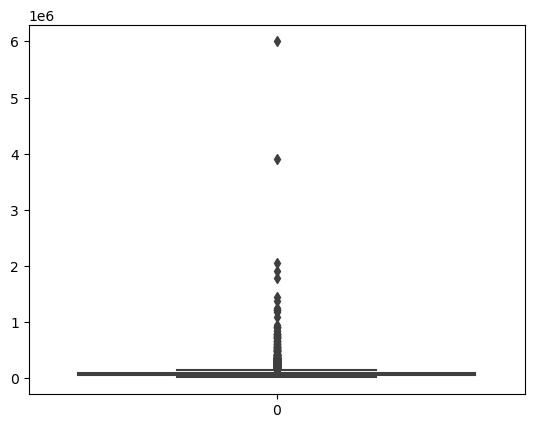

In [39]:
#boxplot for outliers
sns.boxplot(loan_data['annual_inc'])

##### Clearly indincating the presence of outliers.So remove outliers.
Let's see the quantile info and take an appropriate action.
The values after 90 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
So, considering threshold for removing outliers as 0.90

In [40]:
#removing outliers
quantiles = loan_data['annual_inc'].quantile([0.5, 0.75, 0.90, 0.92, 0.95, 0.97, 0.98, 0.99])
quantiles

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.92    122000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [41]:
#considering 95 percentile data for the analysis
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data['annual_inc'] <= per_95_annual_inc] #removing outliers
loan_data.shape

(36606, 24)

<Axes: >

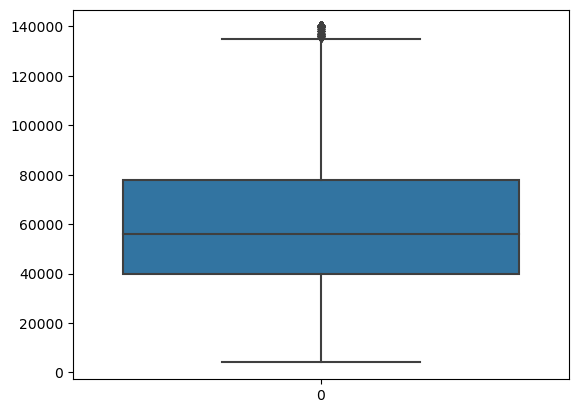

In [42]:
sns.boxplot(loan_data['annual_inc'])

Now the "annual_inc" data looks good.

In [43]:
#standardizing the sub grade data usefull in the visialization
loan_data['sub_grade'] = pd.to_numeric(loan_data['sub_grade'].apply(lambda x : x[-1]))
loan_data['sub_grade'].head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

Let's analyze other numerical variables which could possibly have outliers:
- dti
- loan_amnt
- funded_amnt_inv

<Axes: >

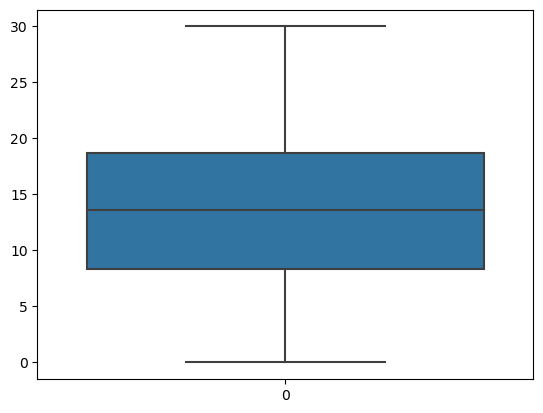

In [44]:
#plot dti 
sns.boxplot(loan_data['dti'])

<Axes: >

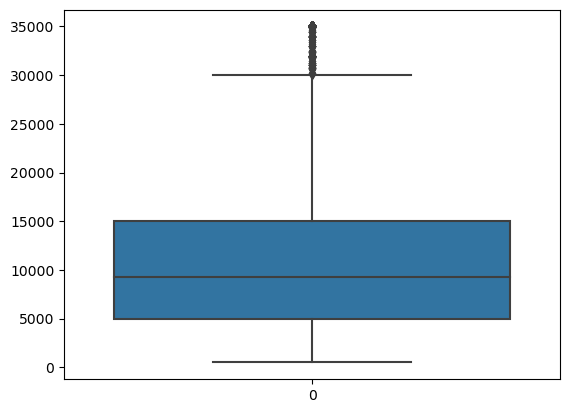

In [45]:
#plot loan amount
sns.boxplot(loan_data['loan_amnt'])

We do have some outliers in "loan_amnt". Lets remove the outliers in "loan_amnt"


In [46]:
# remove outliers
loan_data['loan_amnt'].quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

In [47]:
#consider 95 percentile data for the analysis
per_95_loan_amnt = loan_data['loan_amnt'].quantile(0.95)
loan_data = loan_data[loan_data['loan_amnt'] <= per_95_loan_amnt] #removing outliers
loan_data.shape

(35489, 24)

<Axes: >

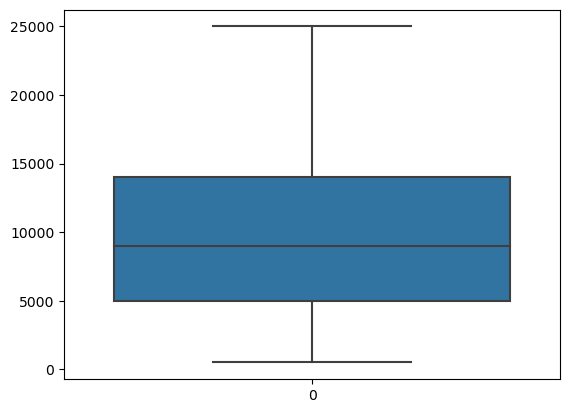

In [48]:
#outliers remvoed
sns.boxplot(loan_data['loan_amnt'])

<Axes: >

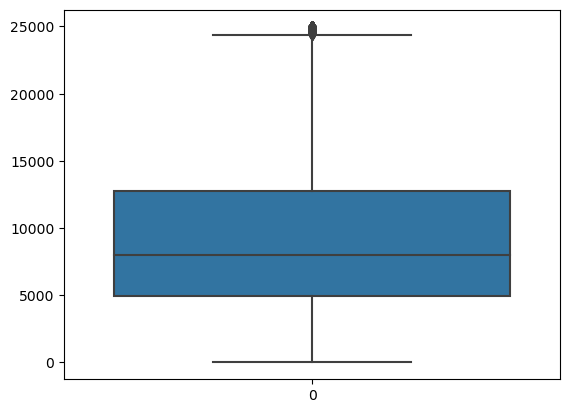

In [49]:
#funded amount is having less outliers we can ignore for now 
sns.boxplot(loan_data['funded_amnt_inv'])

## Data Analysis

- Univariate Analysis : Univariate statistics summarize only one variable at a time. 
- Bivariate Analysis :Bivariate statistics compare two variables.

### Univariate Analysis

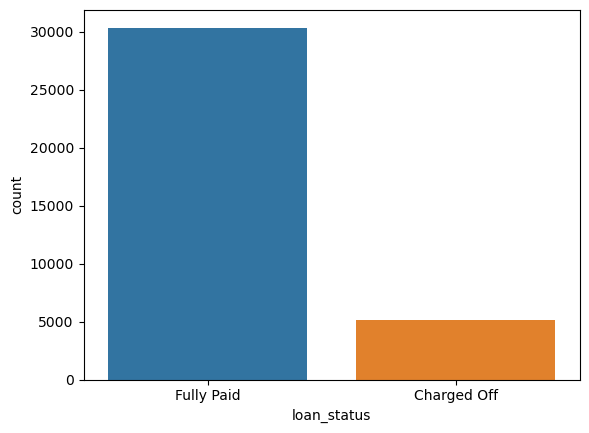

In [50]:
#taking one column at a time
ax = sns.countplot(x="loan_status",data=loan_data)

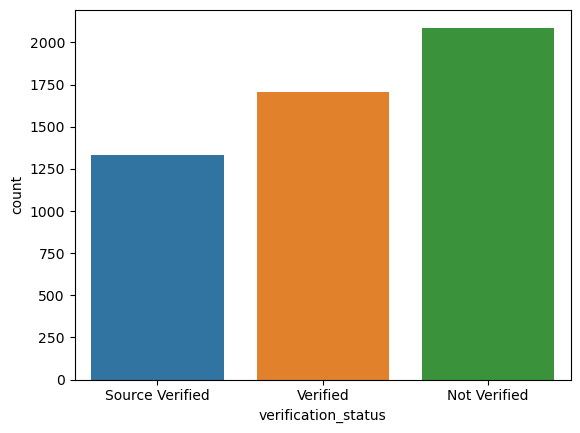

In [51]:
#charged off loan data
ax = sns.countplot(x="verification_status",data=loan_data[loan_data.loan_status == 'Charged Off'])

In [52]:
#two data having "NONE" just impute to "OTHER"
loan_data['home_ownership'] = loan_data['home_ownership'].apply(lambda x : x if x != 'NONE' else 'OTHER')

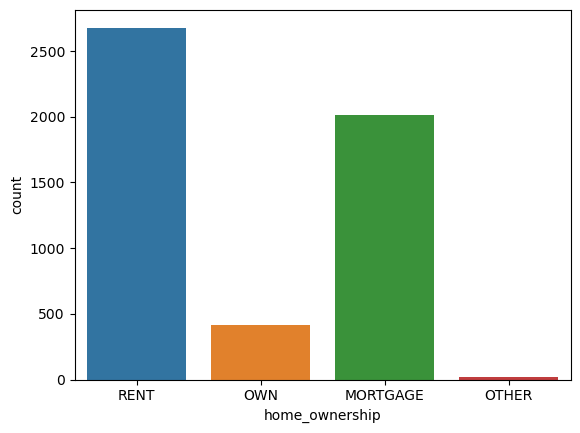

In [53]:
#plot 'home_ownership' for Charged Off loan
ax = sns.countplot(x="home_ownership",data=loan_data[loan_data.loan_status == 'Charged Off'])

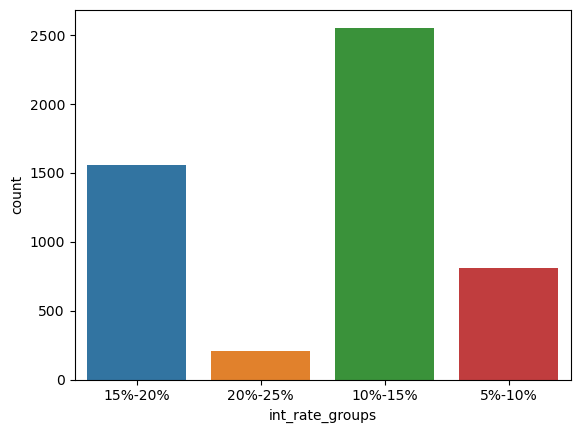

In [54]:
#plot 'int_rate_groups' for Charged Off loan
ax = sns.countplot(x="int_rate_groups",data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='purpose'>

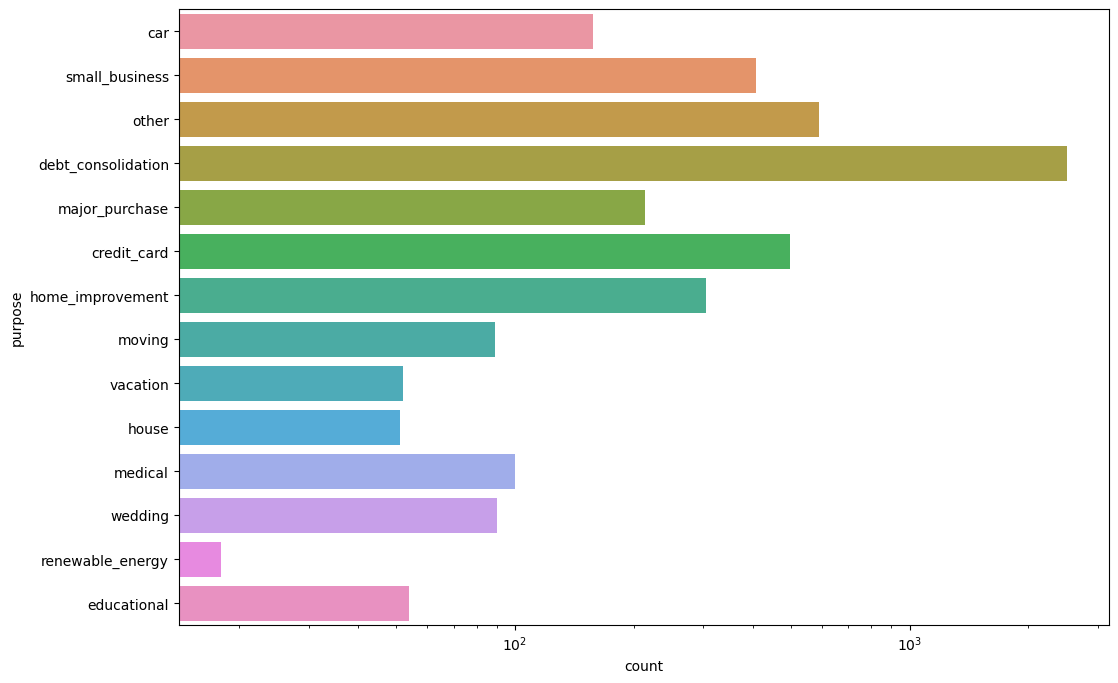

In [55]:
#plot 'purpose' for Charged Off loan
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

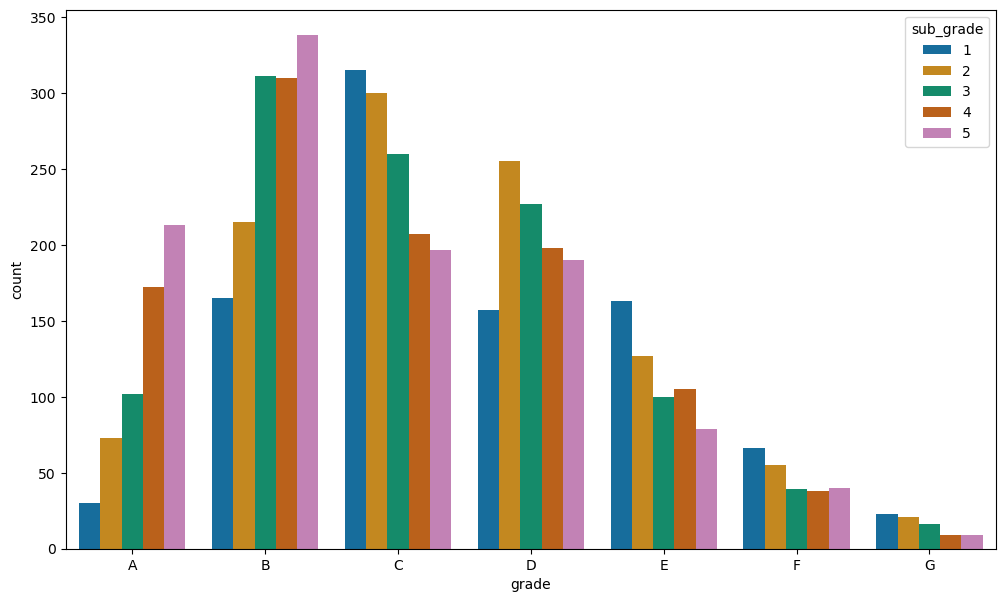

In [56]:
#plot Grade and subgrade for Charged Off loan
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data['loan_status'] == 'Charged Off'])

<Axes: xlabel='emp_length', ylabel='count'>

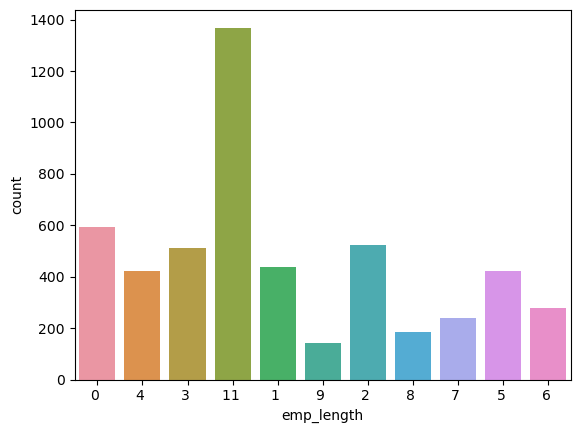

In [57]:
#plot 'emp_length' for Charged Off loan
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

In [58]:
#format the "annual_inc" columns to float
loan_data.annual_inc = loan_data['annual_inc'].astype(float)

<Axes: xlabel='annual_inc_groups', ylabel='count'>

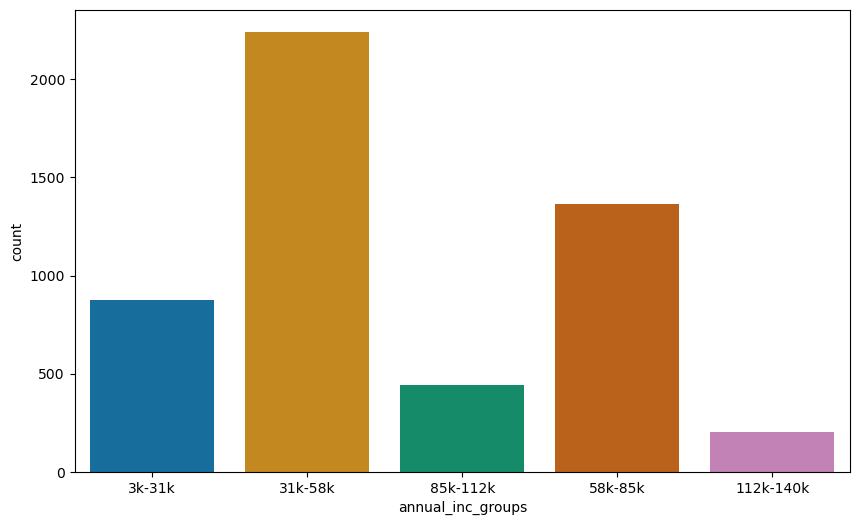

In [59]:
#plot 'annual_inc_groups' for Charged Off loan
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

#### Continuing analysis on issue date, dti and loan_amt

In [60]:
## Extracting month and year
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]

<Axes: xlabel='issue_year', ylabel='count'>

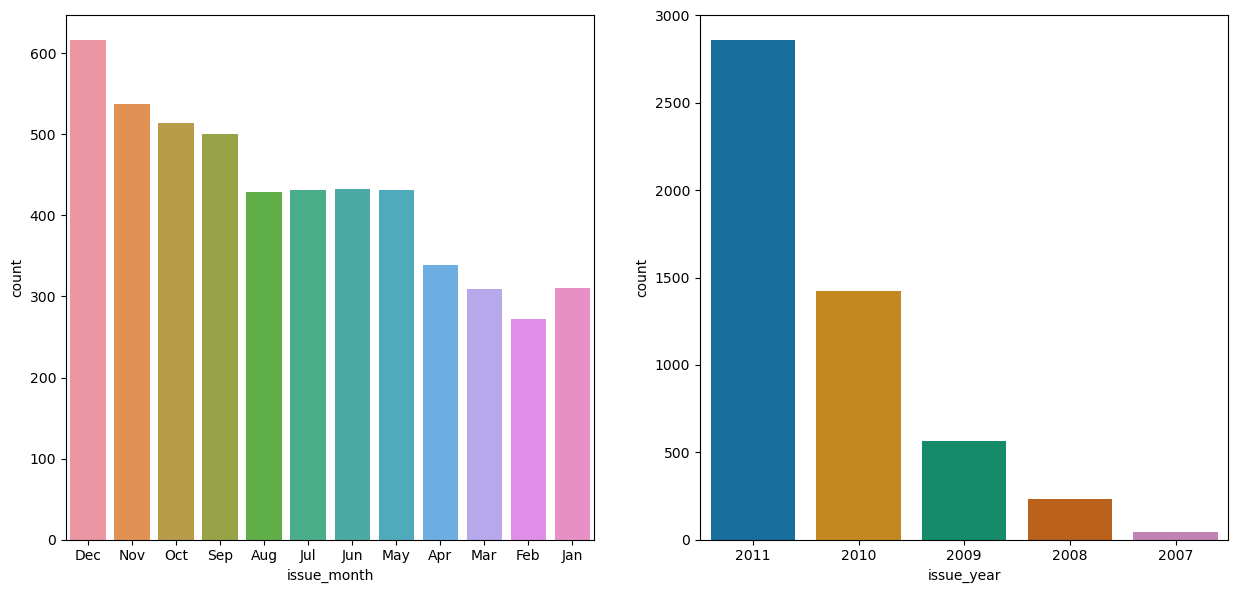

In [61]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'])

#### From the above graphs its clear that most defaults are in December and in 2011 we see lot of default loans (due to the financial crisis in USA) 

In [62]:
#creating bins for loan amount
def create_loan_amount_group(x):
    if x>0 and x <= 5000:
        return '0-5k'
    elif x >5000 and x <= 10000:
        return '5k-10k'
    elif x > 10000 and x <= 15000:
        return '10k-15k'
    elif x > 15000 and x <= 20000:
        return '15k-20k'
    elif x > 20000 and x <= 25000:
        return '20k-25k'
    elif x > 25000 and x <= 30000:
        return '25k-30k'
    else:
        return '30k-35k'

In [63]:
loan_data['loan_amnt_groups'] = loan_data['loan_amnt'].apply(lambda x:create_loan_amount_group(x))

In [64]:
#creating bins for dti
def create_dti_group(x):
    if x>0 and x <= 6:
        return '0-6'
    elif x > 6 and x <= 12:
        return '6-12'
    elif x > 12 and x <= 18:
        return '12-18'
    elif x > 18 and x <= 24:
        return '18-24'
    else:
        return '24-30'

In [65]:
loan_data['dti_groups'] = loan_data['dti'].apply(lambda x:create_dti_group(x))

In [66]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,annual_inc_groups,issue_month,issue_year,loan_amnt_groups,dti_groups
0,5000,5000,4975.0,36 months,10.65,162.87,B,2,11,RENT,...,3,0,83.7,9,10%-15%,3k-31k,Dec,2011,0-5k,24-30
1,2500,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,...,3,0,9.4,4,15%-20%,3k-31k,Dec,2011,0-5k,0-6
2,2400,2400,2400.0,36 months,15.96,84.33,C,5,11,RENT,...,2,0,98.5,10,15%-20%,3k-31k,Dec,2011,0-5k,6-12
3,10000,10000,10000.0,36 months,13.49,339.31,C,1,11,RENT,...,10,0,21.0,37,10%-15%,31k-58k,Dec,2011,5k-10k,18-24
5,5000,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,...,9,0,28.3,12,5%-10%,31k-58k,Dec,2011,0-5k,6-12


In [67]:
loan_data[['dti','dti_groups','loan_amnt','loan_amnt_groups']]

,dti,dti_groups,loan_amnt,loan_amnt_groups
0,27.65,24-30,5000,0-5k
1,1.00,0-6,2500,0-5k
2,8.72,6-12,2400,0-5k
3,20.00,18-24,10000,5k-10k
5,11.20,6-12,5000,0-5k
...,...,...,...,...
39711,15.55,12-18,5000,0-5k
39712,11.33,6-12,2500,0-5k
39713,6.40,6-12,8500,5k-10k
39714,2.30,0-6,5000,0-5k


<Axes: xlabel='loan_amnt_groups', ylabel='count'>

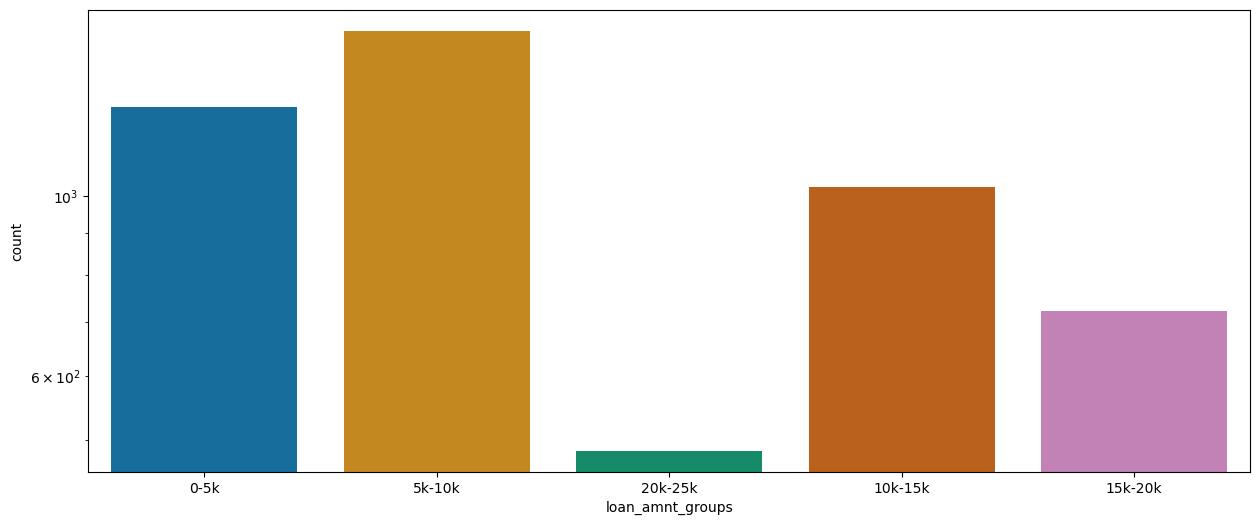

In [68]:
#plot loan amount groups
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

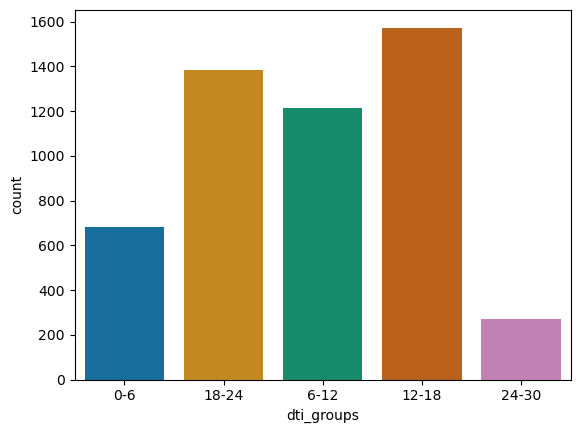

In [69]:
#plot dti group 
sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

### Observation from univariate analysis

1. "Not Verified" loans are more Charged Off
2. Most Charged of loans having home_ownership = RENT
3. Most Charged off loans having interest rate 10-15%
4. Most Charged off loans having Borrrower annual income range between 31k - 58k
5. Most Charged off loans borrower having employment length > 10 years
6. Most Charged off loan purpose is "debt_consolidation"
7. Most defaults are in December and in 2011 (due to the financial crisis in USA)
8. Most default application loan amount is between 5k -10k
9. Most default application dit is between 12-18

### Bi-Variate Analysis

#### Analysing annual income with other columns for more insights
1.Annual income vs loan purpose

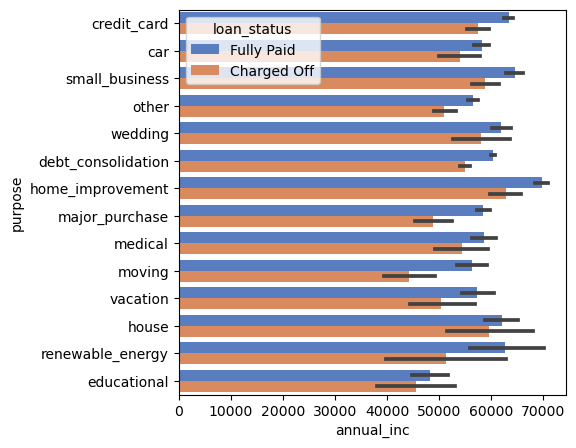

In [70]:
#plot income vs purpose
plt.figure(figsize=(5,5))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="muted")
plt.show()

2.Annual income vs home ownership

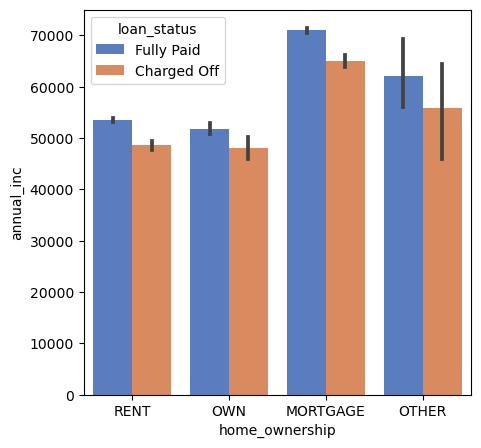

In [71]:
#plot income vs home ownership
plt.figure(figsize=(5,5))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="muted")
plt.show()

3. Annual income vs int_rate

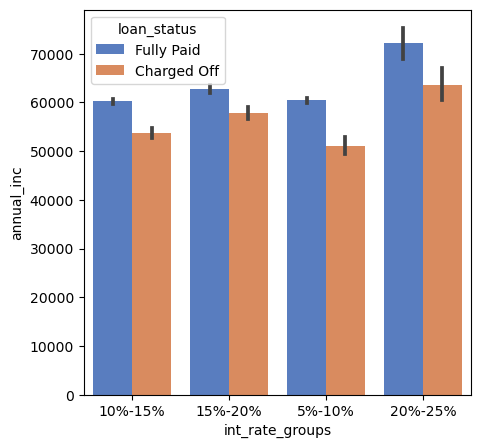

In [72]:
#plat income vs interest rate
plt.figure(figsize=(5,5))
sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="muted")
plt.show()

#### Analysing loan_amount with other columns for more insights
1.Loan amount vs interest rate

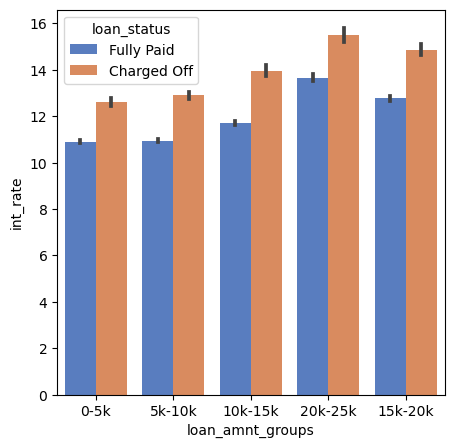

In [73]:
#plot loan amount vs interest rate
plt.figure(figsize=(5,5))
sns.barplot(data =loan_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="muted")
plt.show()

2. Loan amount vs Home Ownership

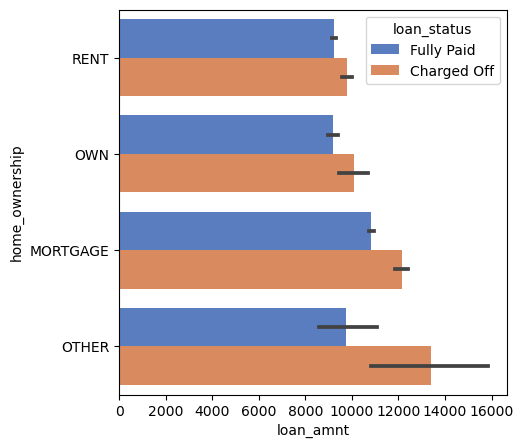

In [74]:
#ploat loan amount vs home ownership
plt.figure(figsize=(5,5))
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="muted")
plt.show()

3. Loan amount vs Purpose

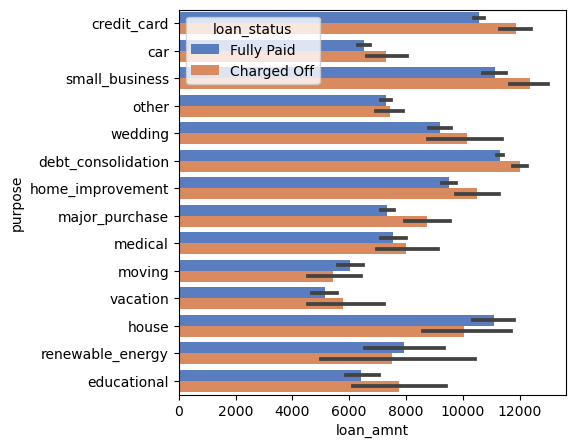

In [75]:
#loan amount vs purpose
plt.figure(figsize=(5,5))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="muted")
plt.show()

#### Observations from bivariate analysis
1. Most applications with purpose 'home_improvement' or 'house' and having income between 50k - 70k are prone to default
2. Applications whoes home ownership is 'MORTGAGE' and have income of 60-70k are mostly defaulters
3. Applicants who receive interest rate between 20-25% and have an income of 50k-60k are defaulters
4. Applicants who have taken a loan amount between 20k - 25k and are charged interest rate of 14-16% are defaulters
5. Applicants who have taken a loan for debt consolidation, small business and credit card and the loan amount is greater than 10k are defaulters
6. Applicants whose home ownership is 'OTHER' and have loan amount of 12k-14k are defaulters

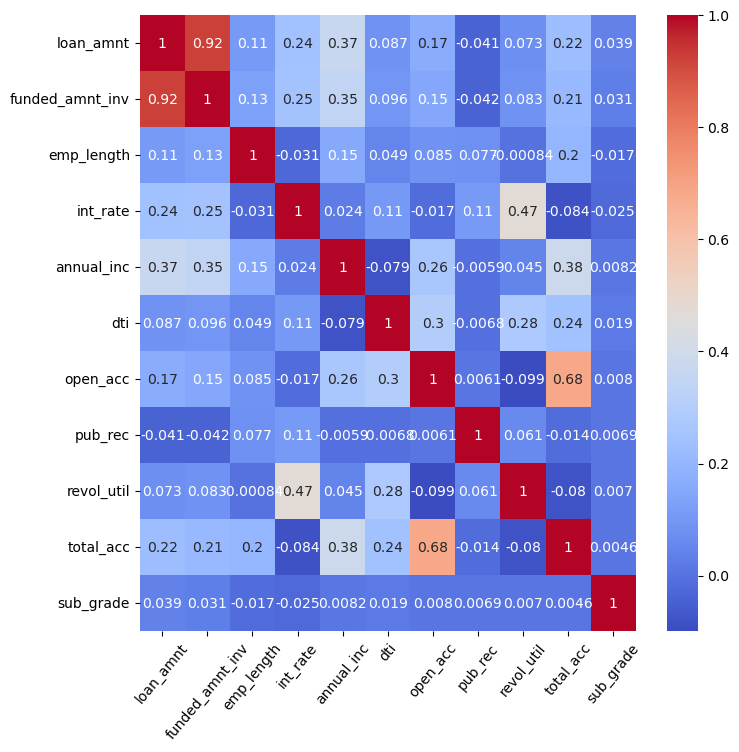

In [78]:
#Corelation graph
numeric_columns = ['loan_amnt','funded_amnt_inv','emp_length','int_rate','annual_inc','dti','open_acc','pub_rec','revol_util','total_acc','sub_grade']
correlation_matrix = loan_data[numeric_columns].corr()

f,ax = plt.subplots(figsize= (8,8))
sns.heatmap(correlation_matrix,xticklabels = correlation_matrix.columns.values,yticklabels= correlation_matrix.columns.values,cmap= 'coolwarm', annot = True)
plt.xticks(rotation=50)
plt.show()

#### Positively Co-related attributes:
1. Loan Amount and Funded amounts
2. Annual Income and loan amount
3. Interest rate and annual income